# Nhóm 6 : Dự đoán bệnh tim mạch

### Danh sách thành viên
*   21110814-Nguyễn Đoàn Tiến Anh
*   21110815-Nguyễn Kỳ Anh
*   21110319-Trần Văn Tiến
*   21110166-Nguyễn Hồng Thông Điệp

## 1. Load dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## 2. Trực quan hóa dữ liệu

In [ ]:
# Đếm số lượng các giá trị "yes" và "no" trong cột "HeartDisease"
heart_disease_counts = df['HeartDisease'].value_counts()

# In ra số lượng các giá trị "yes" và "no"
print("Số lượng 'yes':", heart_disease_counts['Yes'])
print("Số lượng 'no':", heart_disease_counts['No'])

Số lượng 'yes': 27373
Số lượng 'no': 292422


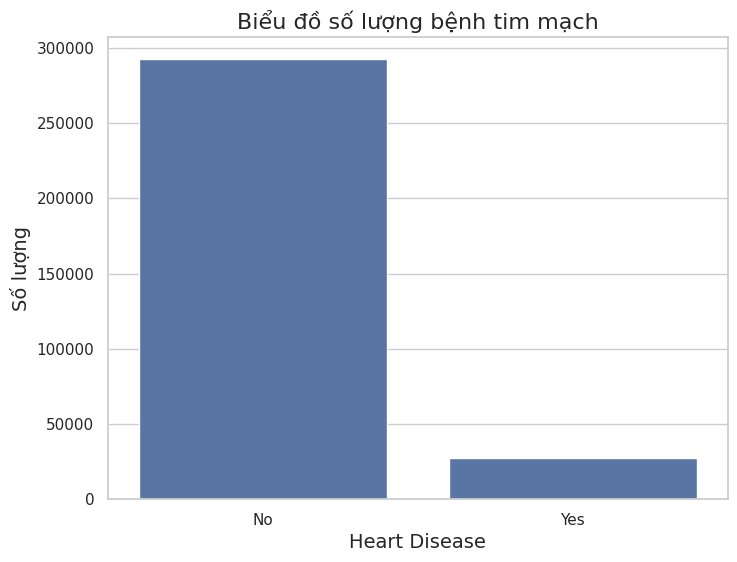

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước và kiểu style cho biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Vẽ biểu đồ cột
sns.countplot(x='HeartDisease', data=df)

# Đặt tiêu đề và nhãn cho trục x và y
plt.title('Biểu đồ số lượng bệnh tim mạch', fontsize=16)
plt.xlabel('Heart Disease', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Lọc dữ liệu thành hai nhóm dựa trên giá trị trong cột "HeartDisease"
heart_disease_yes = df[df['HeartDisease'] == 'Yes']
heart_disease_no = df[df['HeartDisease'] == 'No']

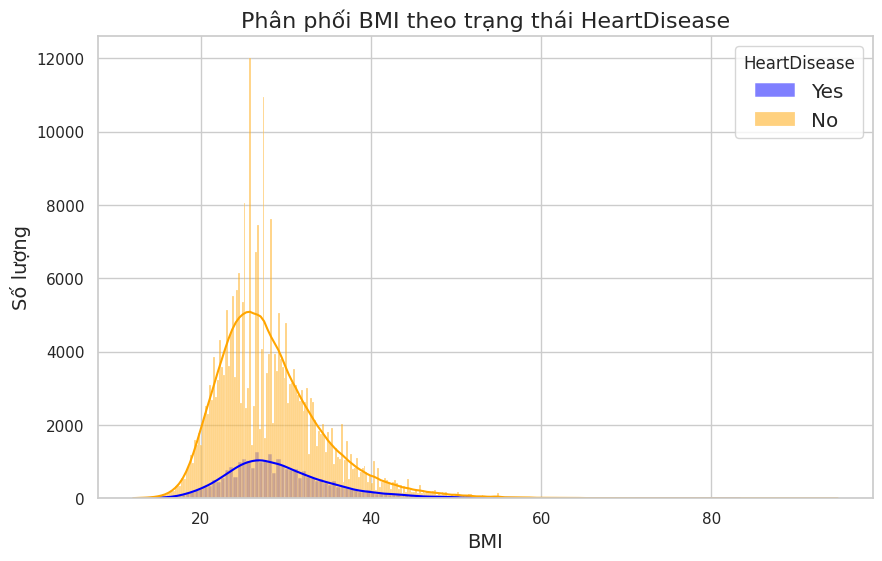

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước và kiểu style cho biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân phối của BMI dựa trên HeartDisease Yes
sns.histplot(data=heart_disease_yes, x='BMI', kde=True, color='blue', label='Yes', legend=True)

# Vẽ biểu đồ phân phối của BMI dựa trên HeartDisease No
sns.histplot(data=heart_disease_no, x='BMI', kde=True, color='orange', label='No', legend=True)

# Đặt tiêu đề và nhãn cho trục x và y
plt.title('Phân phối BMI theo trạng thái HeartDisease', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.legend(title='HeartDisease', fontsize='large')
plt.show()


<ipython-input-11-e35f1fed38c8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking', data=heart_disease_yes, palette=['blue', 'orange'])
<ipython-input-11-e35f1fed38c8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking', data=heart_disease_no, palette=['blue', 'orange'])


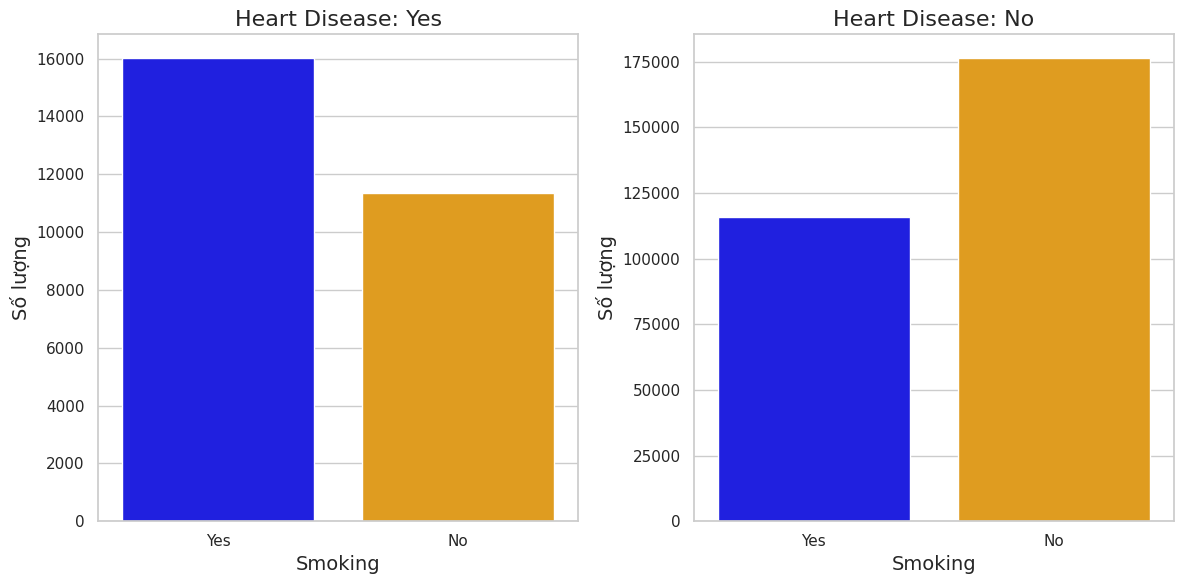

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước và kiểu style cho biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ countplot cho cột "Smoking" trong heart_disease_yes, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 1)
sns.countplot(x='Smoking', data=heart_disease_yes, palette=['blue', 'orange'])
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('Smoking', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "Smoking" trong heart_disease_no, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 2)
sns.countplot(x='Smoking', data=heart_disease_no, palette=['blue', 'orange'])
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('Smoking', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-12-a817068ebed8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AlcoholDrinking', data=heart_disease_yes, palette=['blue', 'orange'])
<ipython-input-12-a817068ebed8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AlcoholDrinking', data=heart_disease_no, palette=['blue', 'orange'])


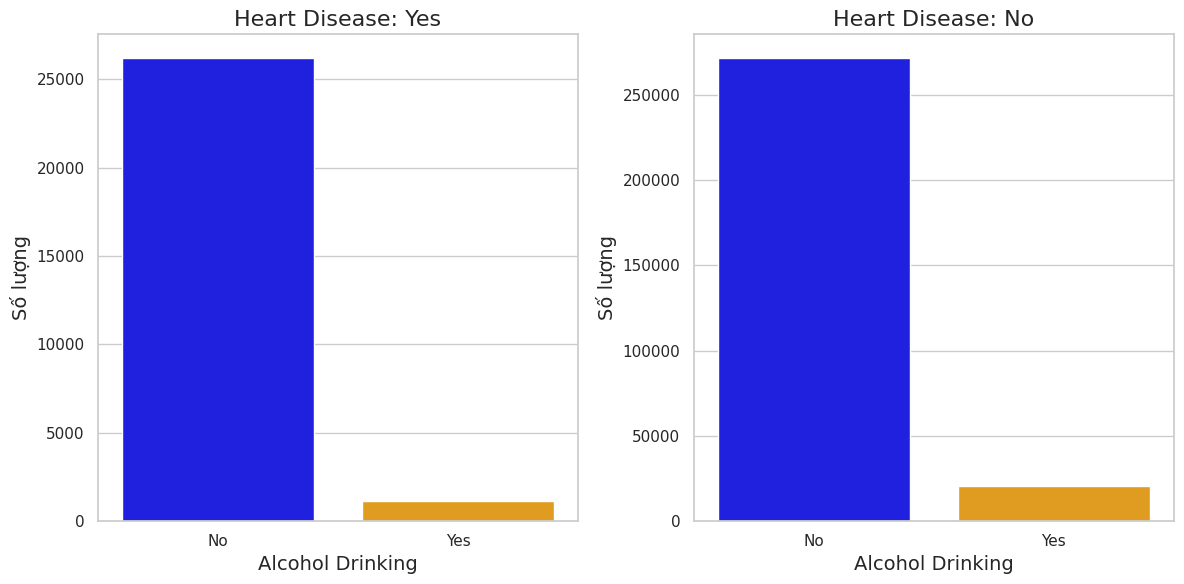

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước và kiểu style cho biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ countplot cho cột "AlcoholDrinking" trong heart_disease_yes, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 1)
sns.countplot(x='AlcoholDrinking', data=heart_disease_yes, palette=['blue', 'orange'])
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('Alcohol Drinking', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "AlcoholDrinking" trong heart_disease_no, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 2)
sns.countplot(x='AlcoholDrinking', data=heart_disease_no, palette=['blue', 'orange'])
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('Alcohol Drinking', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-13-944ddc283b0f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stroke', data=heart_disease_yes, palette=['blue', 'orange'])
<ipython-input-13-944ddc283b0f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stroke', data=heart_disease_no, palette=['blue', 'orange'])


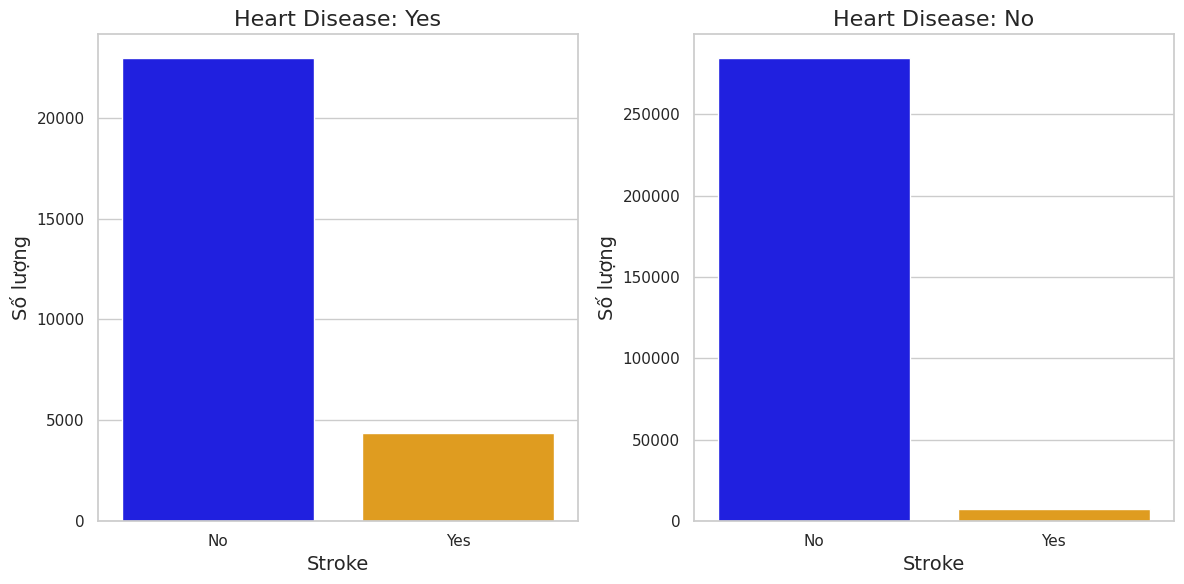

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước và kiểu style cho biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ countplot cho cột "Stroke" trong heart_disease_yes, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 1)
sns.countplot(x='Stroke', data=heart_disease_yes, palette=['blue', 'orange'])
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "Stroke" trong heart_disease_no, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 2)
sns.countplot(x='Stroke', data=heart_disease_no, palette=['blue', 'orange'])
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


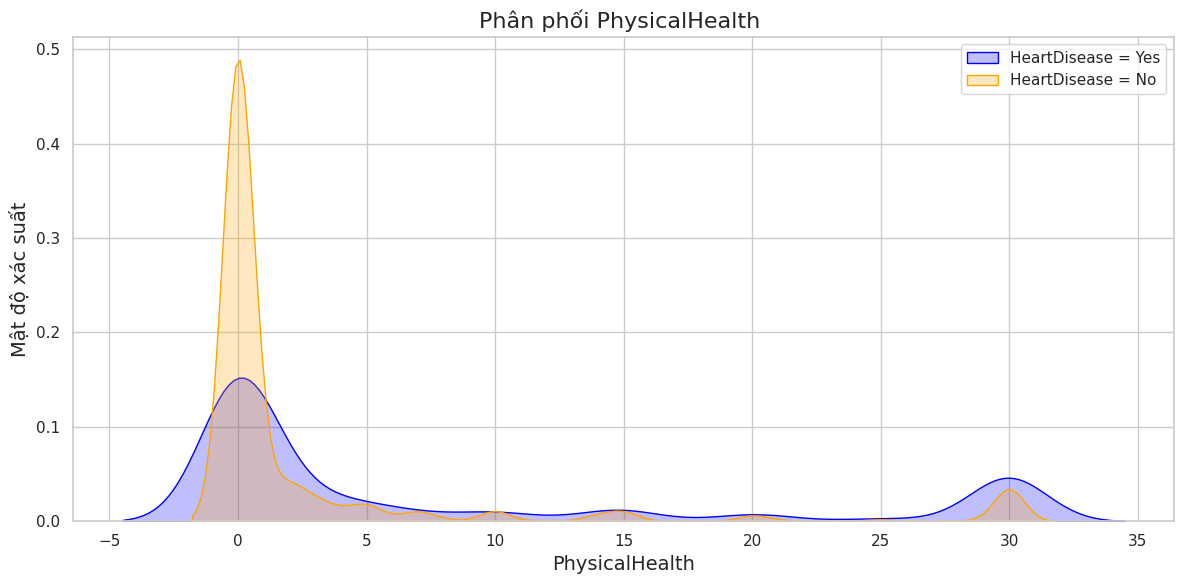

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước và kiểu style cho biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ kdeplot của PhysicalHealth dựa trên HeartDisease: Yes
sns.kdeplot(data=heart_disease_yes, x='PhysicalHealth', color='blue', fill=True, label='HeartDisease = Yes')
plt.title('Phân phối PhysicalHealth khi HeartDisease = Yes', fontsize=16)
plt.xlabel('PhysicalHealth', fontsize=14)
plt.ylabel('Mật độ xác suất', fontsize=14)

# Vẽ biểu đồ kdeplot của PhysicalHealth dựa trên HeartDisease: No
sns.kdeplot(data=heart_disease_no, x='PhysicalHealth', color='orange', fill=True, label='HeartDisease = No')
plt.title('Phân phối PhysicalHealth ', fontsize=16)
plt.xlabel('PhysicalHealth', fontsize=14)
plt.ylabel('Mật độ xác suất', fontsize=14)

# Hiển thị hộp chú thích
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


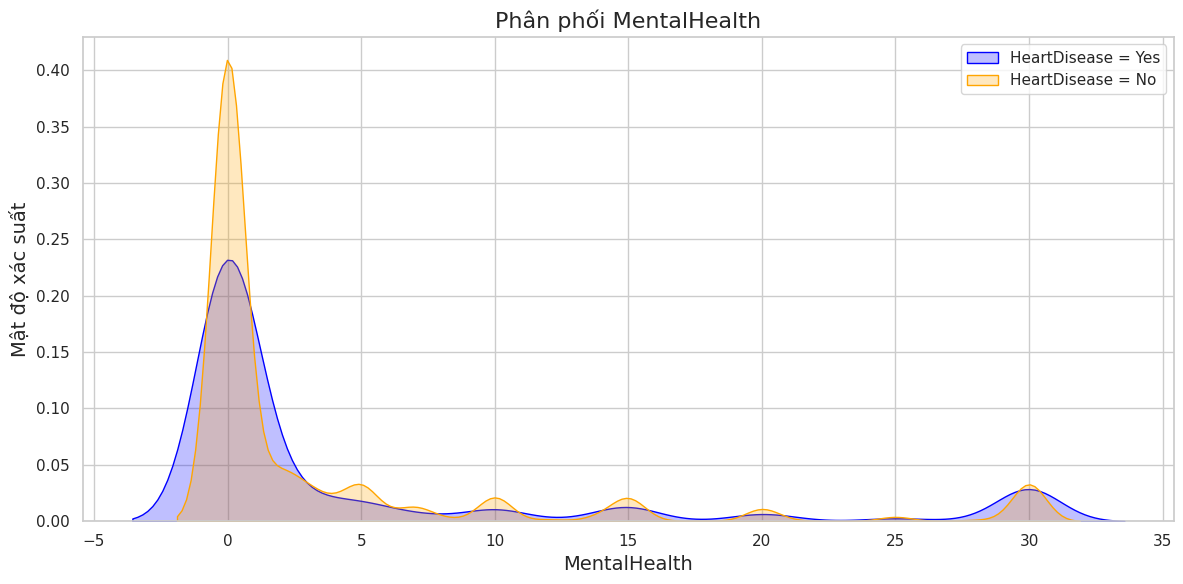

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước và kiểu style cho biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ kdeplot của PhysicalHealth dựa trên HeartDisease: Yes
sns.kdeplot(data=heart_disease_yes, x='MentalHealth', color='blue', fill=True, label='HeartDisease = Yes')
plt.title('Phân phối MentalHealth', fontsize=16)
plt.xlabel('MentalHealth', fontsize=14)
plt.ylabel('Mật độ xác suất', fontsize=14)

# Vẽ biểu đồ kdeplot của PhysicalHealth dựa trên HeartDisease: No
sns.kdeplot(data=heart_disease_no, x='MentalHealth', color='orange', fill=True, label='HeartDisease = No')
plt.xlabel('MentalHealth', fontsize=14)
plt.ylabel('Mật độ xác suất', fontsize=14)

# Hiển thị hộp chú thích
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

<ipython-input-16-ac15815b2731>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DiffWalking', data=heart_disease_yes, palette=['blue', 'orange'])
<ipython-input-16-ac15815b2731>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DiffWalking', data=heart_disease_no, palette=['blue', 'orange'])


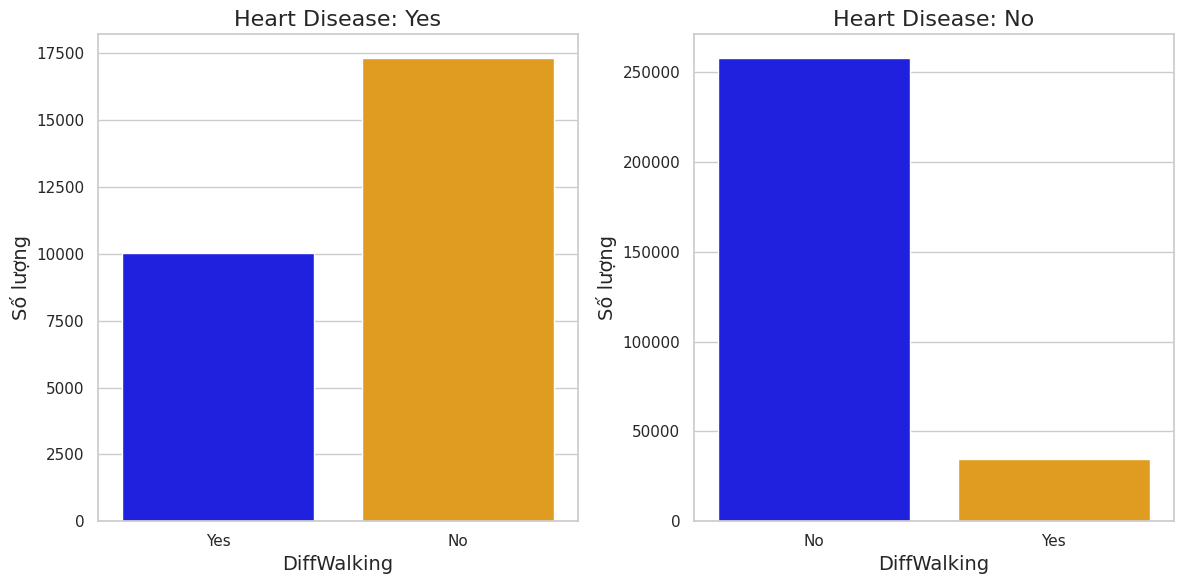

In [ ]:
# Vẽ biểu đồ countplot cho cột "DiffWalking" trong heart_disease_yes, nhóm theo trạng thái Heart Disease
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='DiffWalking', data=heart_disease_yes, palette=['blue', 'orange'])
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('DiffWalking', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "DiffWalking" trong heart_disease_no, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 2)
sns.countplot(x='DiffWalking', data=heart_disease_no, palette=['blue', 'orange'])
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('DiffWalking', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-17-623e76ad6406>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=heart_disease_yes, palette=['blue', 'orange'])
<ipython-input-17-623e76ad6406>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=heart_disease_no, palette=['blue', 'orange'])


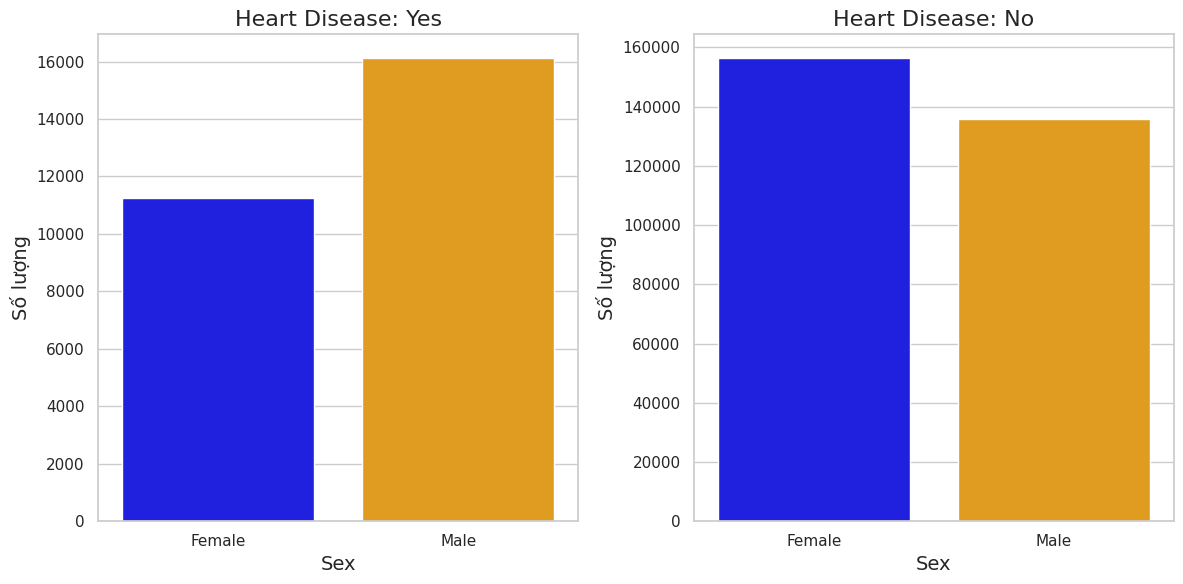

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước và kiểu style cho biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ countplot cho cột "Sex" trong heart_disease_yes, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=heart_disease_yes, palette=['blue', 'orange'])
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "Sex" trong heart_disease_no, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 2)
sns.countplot(x='Sex', data=heart_disease_no, palette=['blue', 'orange'])
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-18-6ee23608739a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeCategory', data=heart_disease_yes, order=column_order, palette='pastel')
<ipython-input-18-6ee23608739a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeCategory', data=heart_disease_no, order=column_order, palette='pastel')


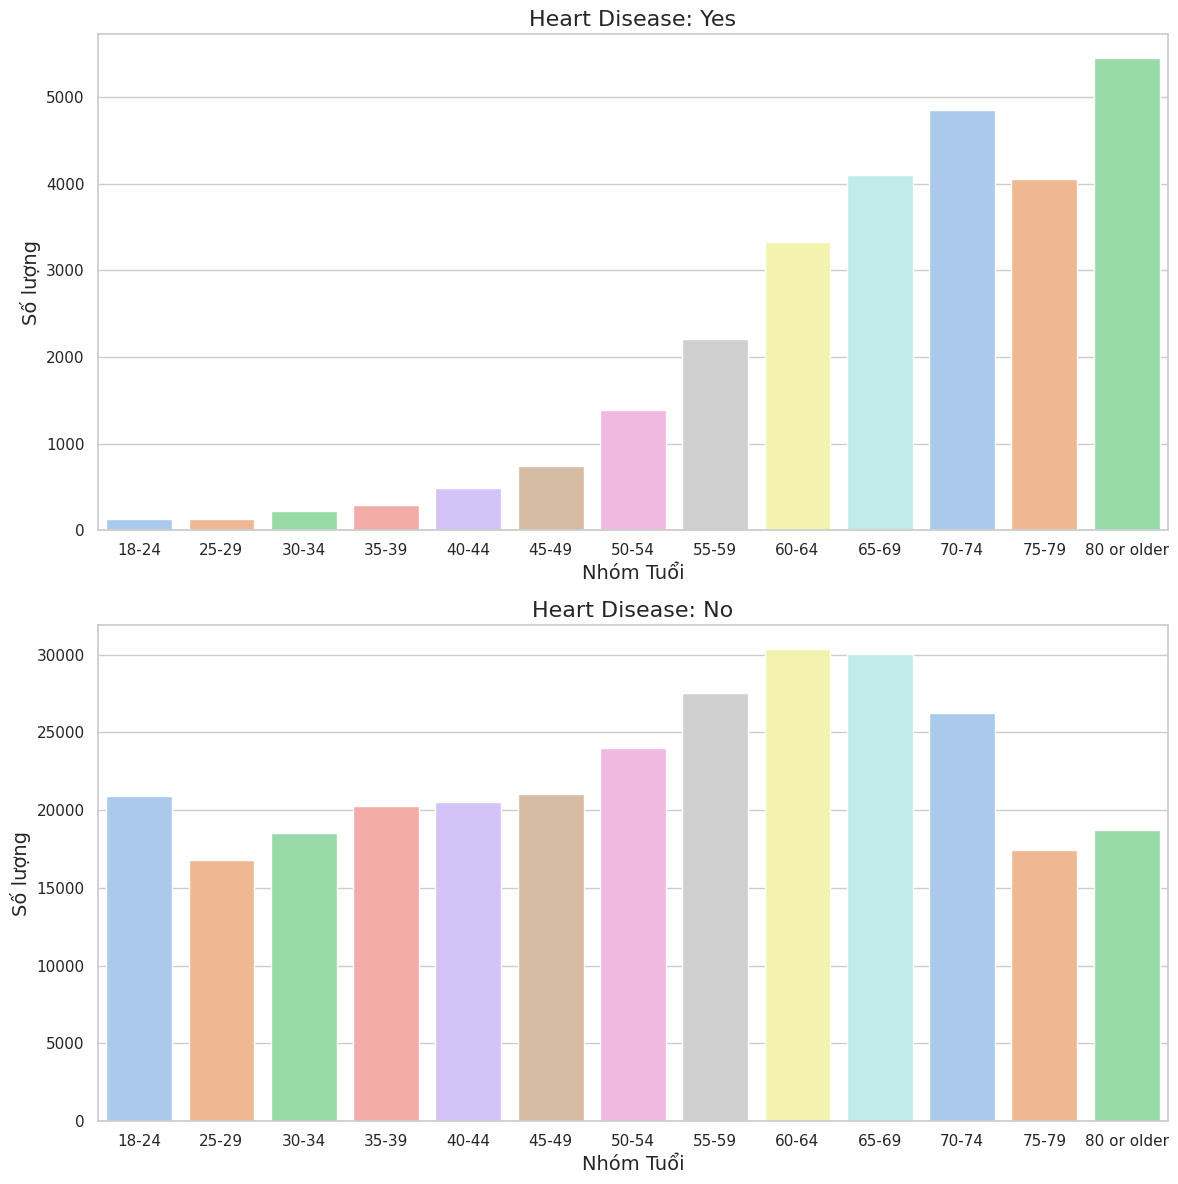

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập thứ tự cột
column_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
                '65-69', '70-74', '75-79', '80 or older']

# Thiết lập kích thước và kiểu style cho biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12))

# Vẽ biểu đồ countplot cho cột "AgeCategory" trong heart_disease_yes
plt.subplot(2, 1, 1)
sns.countplot(x='AgeCategory', data=heart_disease_yes, order=column_order, palette='pastel')
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('Nhóm Tuổi', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "AgeCategory" trong heart_disease_no
plt.subplot(2, 1, 2)
sns.countplot(x='AgeCategory', data=heart_disease_no, order=column_order, palette='pastel')
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('Nhóm Tuổi', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-19-7e59ee701f73>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Race', data=heart_disease_yes, order=column_order ,palette='pastel')
<ipython-input-19-7e59ee701f73>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Race', data=heart_disease_no, order=column_order, palette='pastel')


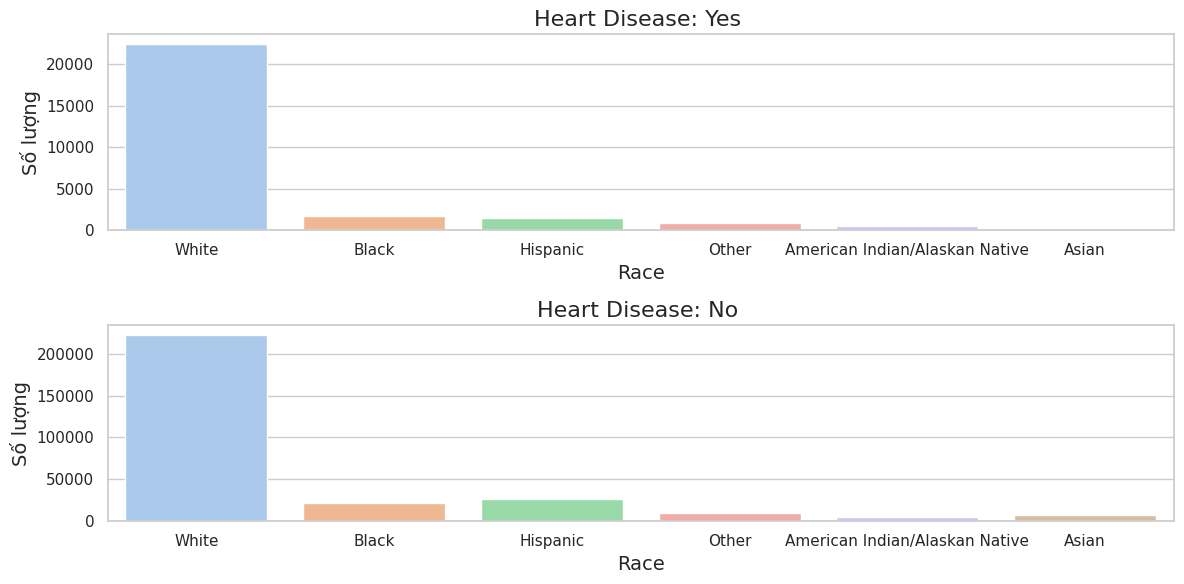

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập thứ tự cột
column_order = ['White', 'Black', 'Hispanic', 'Other', 'American Indian/Alaskan Native','Asian']
# Thiết lập kích thước và kiểu style cho biểu đồ
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Vẽ countplot cho cột "Race" trong heart_disease_yes
plt.subplot(2, 1, 1)
sns.countplot(x='Race', data=heart_disease_yes, order=column_order ,palette='pastel')
plt.title('Heart Disease: Yes ', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ countplot cho cột "Race" trong heart_disease_no
plt.subplot(2, 1, 2)
sns.countplot(x='Race', data=heart_disease_no, order=column_order, palette='pastel')
plt.title('Heart Disease: No ', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-20-06c3b5d498f6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetic', data=heart_disease_yes,order=column_order, palette='pastel')
<ipython-input-20-06c3b5d498f6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetic', data=heart_disease_no,order=column_order, palette='pastel')


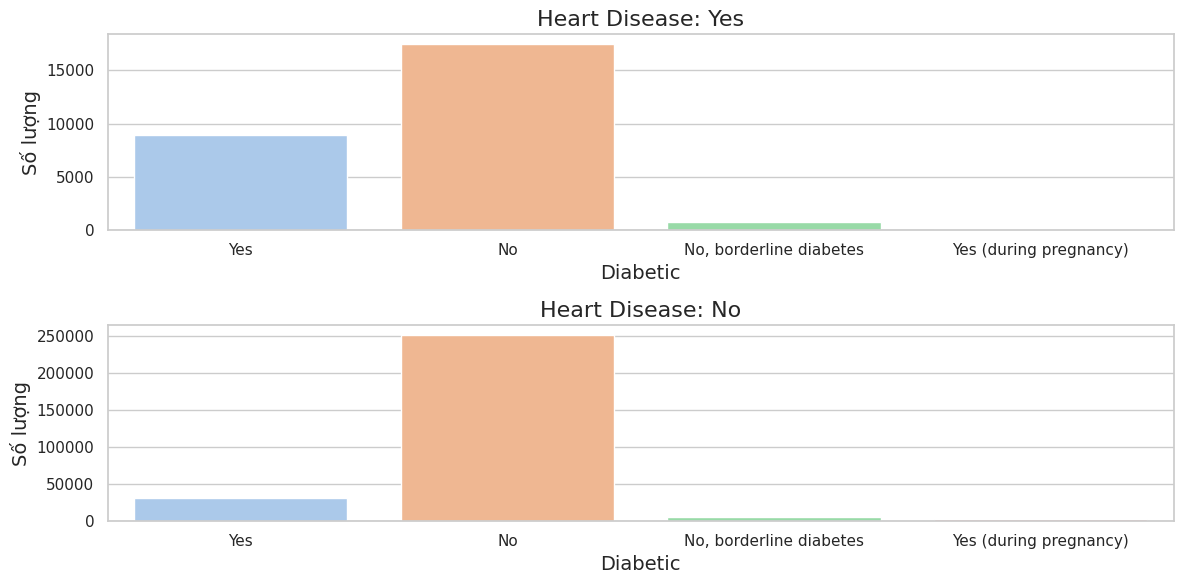

In [ ]:
# Thiết lập thứ tự cột
column_order = ['Yes', 'No', 'No, borderline diabetes' , 'Yes (during pregnancy)']
# Vẽ biểu đồ countplot cho cột "Diabetic" trong heart_disease_yes, nhóm theo trạng thái Heart Disease
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.countplot(x='Diabetic', data=heart_disease_yes,order=column_order, palette='pastel')
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('Diabetic', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "Diabetic" trong heart_disease_no, nhóm theo trạng thái Heart Disease
plt.subplot(2, 1, 2)
sns.countplot(x='Diabetic', data=heart_disease_no,order=column_order, palette='pastel')
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('Diabetic', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-21-4e61ad7196a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PhysicalActivity', data=heart_disease_yes, palette=['blue', 'orange'])
<ipython-input-21-4e61ad7196a6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PhysicalActivity', data=heart_disease_no, palette=['blue', 'orange'])


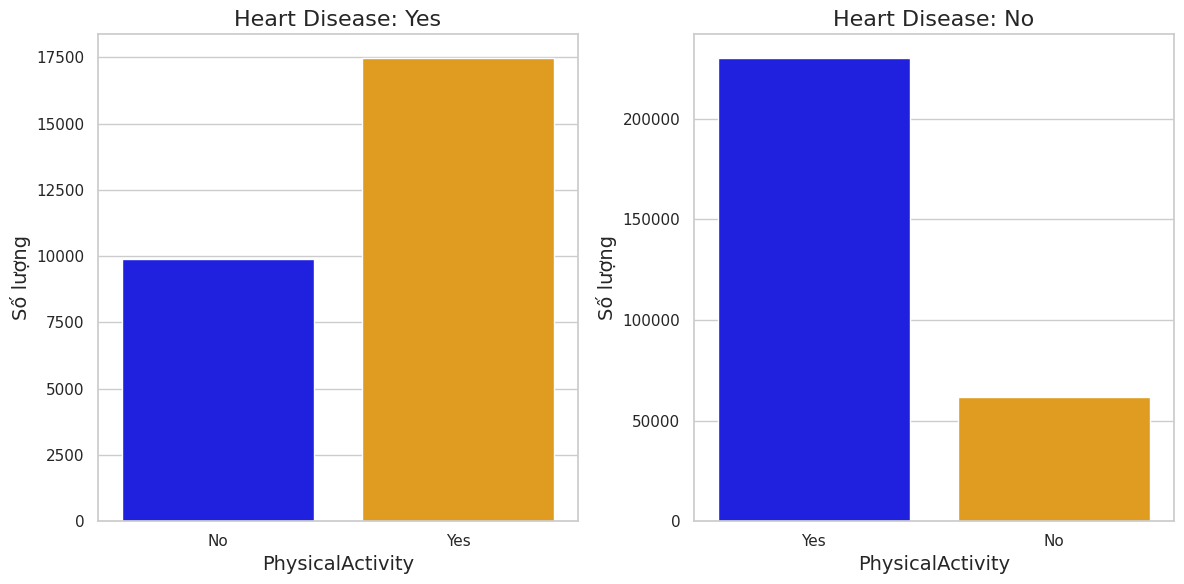

In [ ]:
# Vẽ biểu đồ countplot cho cột "PhysicalActivity" trong heart_disease_yes, nhóm theo trạng thái Heart Disease
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='PhysicalActivity', data=heart_disease_yes, palette=['blue', 'orange'])
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('PhysicalActivity', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "PhysicalActivity" trong heart_disease_no, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 2)
sns.countplot(x='PhysicalActivity', data=heart_disease_no, palette=['blue', 'orange'])
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('PhysicalActivity', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-22-748cc0595e9d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GenHealth', data=heart_disease_yes, order=column_order,palette='pastel')
<ipython-input-22-748cc0595e9d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GenHealth', data=heart_disease_no,order=column_order ,palette='pastel')


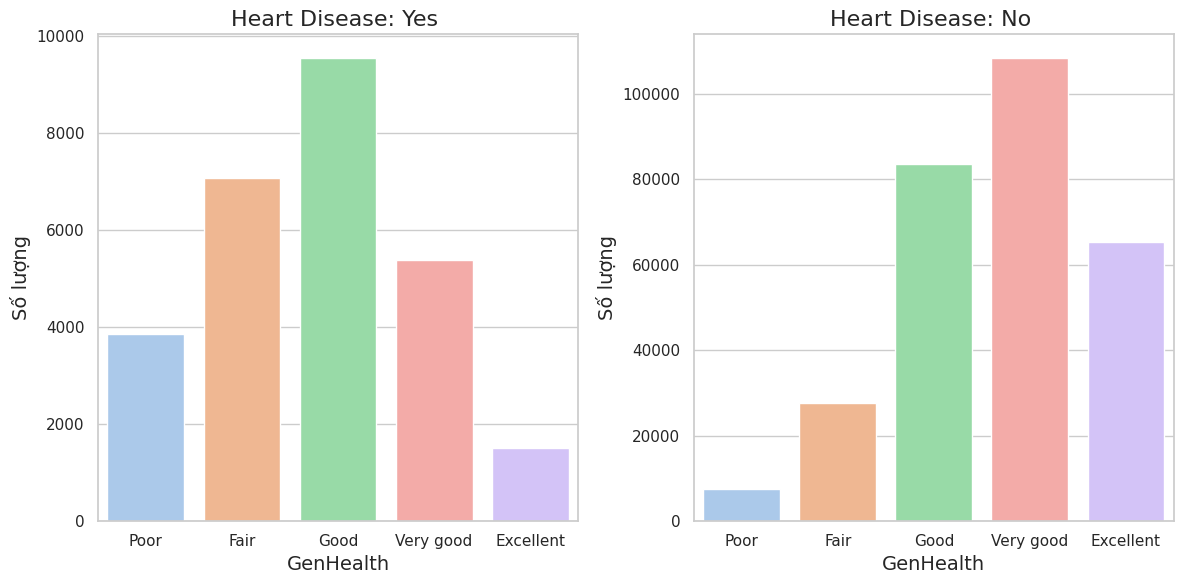

In [ ]:
column_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
# Thiết lập kích thước và kiểu style cho biểu đồ
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Vẽ countplot cho cột "GenHealth" trong heart_disease_yes
plt.subplot(1, 2, 1)
sns.countplot(x='GenHealth', data=heart_disease_yes, order=column_order,palette='pastel')
plt.title('Heart Disease: Yes ', fontsize=16)
plt.xlabel('GenHealth', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ countplot cho cột "GenHealth" trong heart_disease_no
plt.subplot(1, 2, 2)
sns.countplot(x='GenHealth', data=heart_disease_no,order=column_order ,palette='pastel')
plt.title('Heart Disease: No ', fontsize=16)
plt.xlabel('GenHealth', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


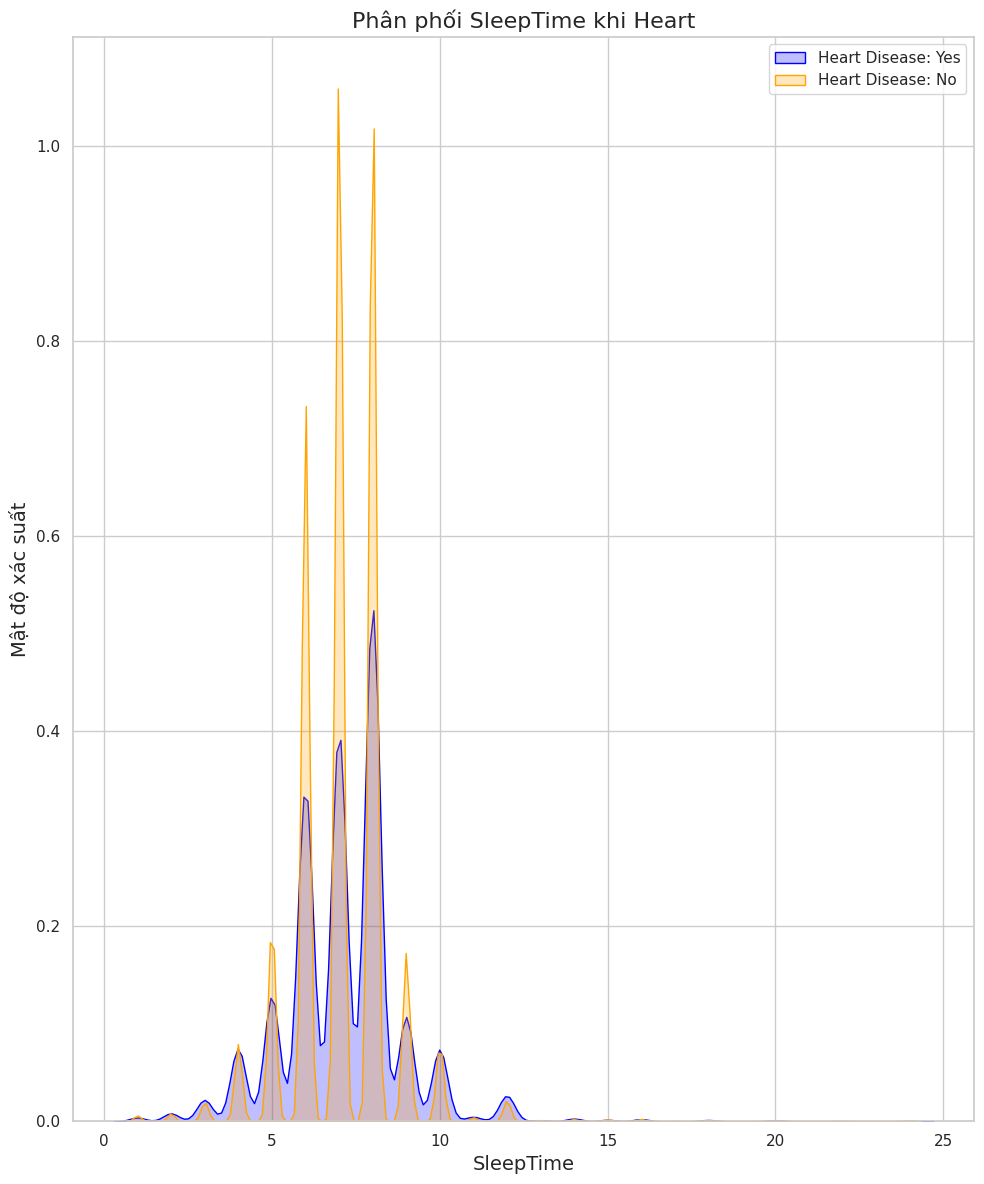

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước và kiểu style cho biểu đồ
plt.figure(figsize=(10, 12))
sns.set(style="whitegrid")

# Vẽ kdeplot cho SleepTime của heart_disease_yes
sns.kdeplot(data=heart_disease_yes, x='SleepTime', color='blue', fill=True, label='Heart Disease: Yes')
plt.xlabel('SleepTime', fontsize=14)
plt.ylabel('Mật độ xác suất', fontsize=14)
plt.legend()

# Vẽ kdeplot cho SleepTime của heart_disease_no
sns.kdeplot(data=heart_disease_no, x='SleepTime', color='orange', fill=True, label='Heart Disease: No')
plt.title('Phân phối SleepTime khi Heart', fontsize=16)
plt.xlabel('SleepTime', fontsize=14)
plt.ylabel('Mật độ xác suất', fontsize=14)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-24-43bfa3cedbf7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Asthma', data=heart_disease_yes, palette=['blue', 'orange'])
<ipython-input-24-43bfa3cedbf7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Asthma', data=heart_disease_no, palette=['blue', 'orange'])


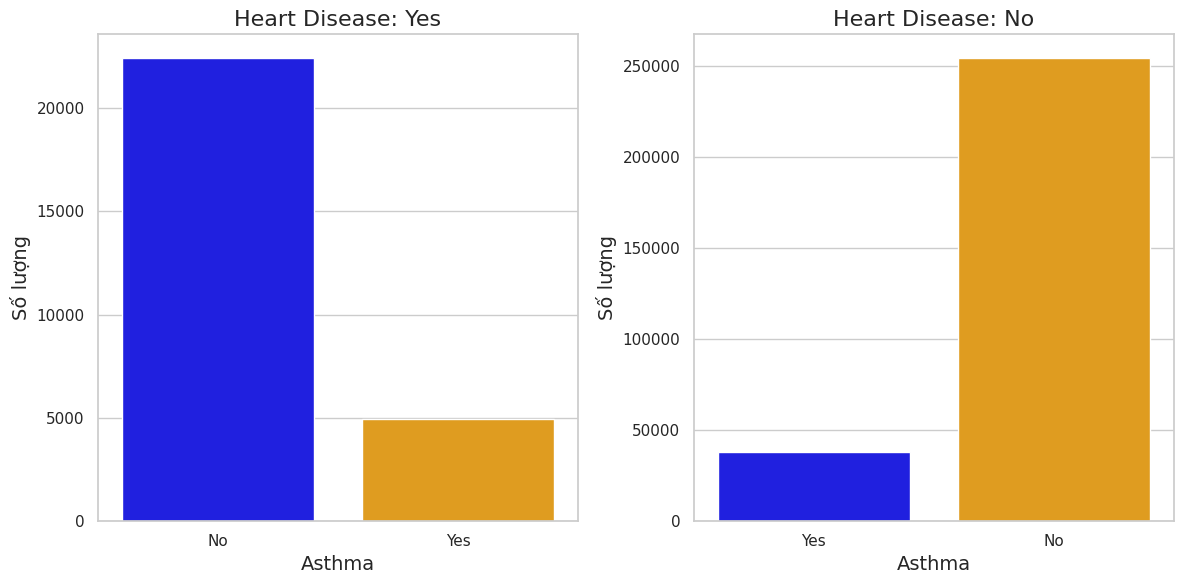

In [ ]:
# Vẽ biểu đồ countplot cho cột "Asthma" trong heart_disease_yes, nhóm theo trạng thái Heart Disease
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Asthma', data=heart_disease_yes, palette=['blue', 'orange'])
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('Asthma', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "Asthma" trong heart_disease_no, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 2)
sns.countplot(x='Asthma', data=heart_disease_no, palette=['blue', 'orange'])
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('Asthma', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-25-c15c2dc765d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KidneyDisease', data=heart_disease_yes, palette=['blue', 'orange'])
<ipython-input-25-c15c2dc765d9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KidneyDisease', data=heart_disease_no, palette=['blue', 'orange'])


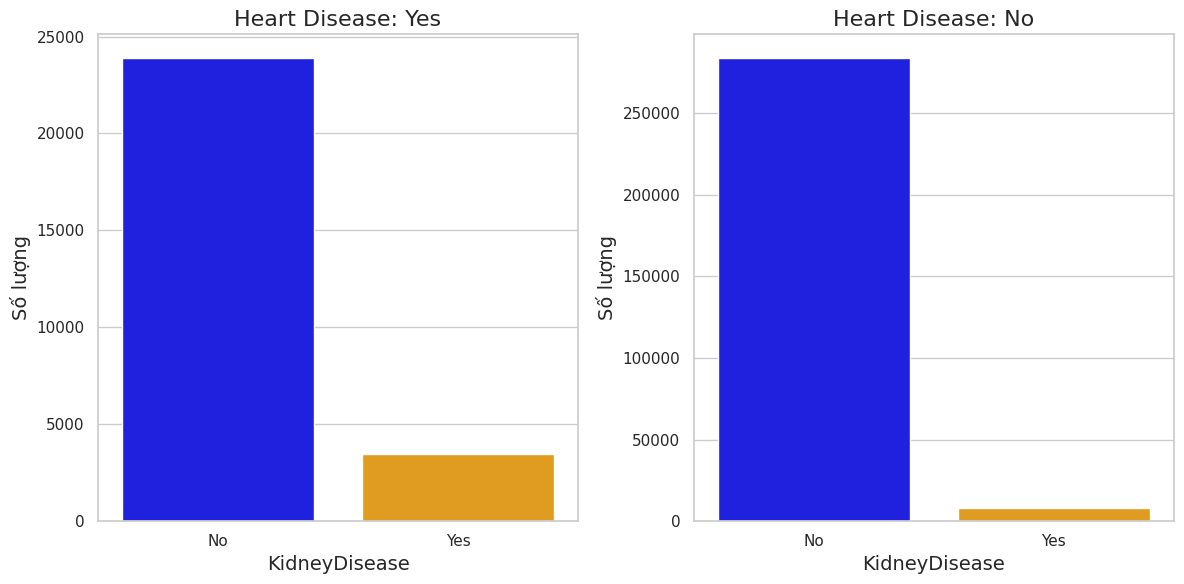

In [ ]:
# Vẽ biểu đồ countplot cho cột "KidneyDisease" trong heart_disease_yes, nhóm theo trạng thái Heart Disease
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='KidneyDisease', data=heart_disease_yes, palette=['blue', 'orange'])
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('KidneyDisease', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "KidneyDisease" trong heart_disease_no, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 2)
sns.countplot(x='KidneyDisease', data=heart_disease_no, palette=['blue', 'orange'])
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('KidneyDisease', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<ipython-input-26-4d2a0d7c1ae1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SkinCancer', data=heart_disease_yes, palette=['blue', 'orange'])
<ipython-input-26-4d2a0d7c1ae1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SkinCancer', data=heart_disease_no, palette=['blue', 'orange'])


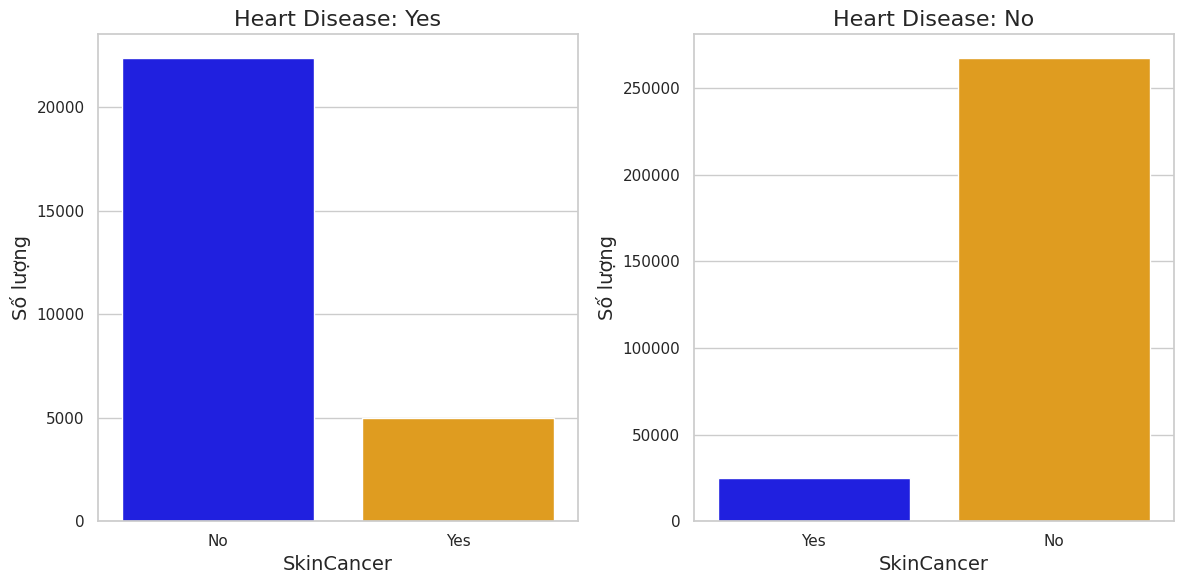

In [ ]:
# Vẽ biểu đồ countplot cho cột "SkinCancer" trong heart_disease_yes, nhóm theo trạng thái Heart Disease
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='SkinCancer', data=heart_disease_yes, palette=['blue', 'orange'])
plt.title('Heart Disease: Yes', fontsize=16)
plt.xlabel('SkinCancer', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Vẽ biểu đồ countplot cho cột "SkinCancer" trong heart_disease_no, nhóm theo trạng thái Heart Disease
plt.subplot(1, 2, 2)
sns.countplot(x='SkinCancer', data=heart_disease_no, palette=['blue', 'orange'])
plt.title('Heart Disease: No', fontsize=16)
plt.xlabel('SkinCancer', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


## 3. Tiền xử lý dữ liệu

### 3.1 Mã hóa dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Import lớp LabelEncoder từ thư viện sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Khởi tạo một đối tượng LabelEncoder
le = LabelEncoder()

# Tạo một bản sao sâu của DataFrame df và lưu vào df1
df = df.copy(deep=True)

# Tạo một danh sách col chứa tên của tất cả các cột trong DataFrame df
col = list(df.columns)

# Khởi tạo hai danh sách rỗng để lưu trữ tên của các biến phân loại và biến số
categorical_features = []
numerical_features = []

# Duyệt qua từng cột i trong df1.columns
for i in df.columns:
    # Kiểm tra số lượng giá trị duy nhất của cột df[i]
    if i == 'Diabetic':
        df['Diabetic'] = df['Diabetic'].replace({
            'Yes (during pregnancy)':1,
            'No, borderline diabetes':0,
            'Yes':1,
            'No':0
        })
    if len(df[i].unique()) > 6:
        # Nếu số lượng giá trị duy nhất lớn hơn 6, thêm tên cột vào danh sách numerical_features
        numerical_features.append(i)
    else:
        # Ngược lại, sử dụng Label Encoder để chuyển đổi cột df1[i] thành dạng số
        df[i] = le.fit_transform(df[i])
        # Thêm tên cột vào danh sách categorical_features
        categorical_features.append(i)

# In ra tất cả các biến phân loại và biến số đã được tìm thấy
print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)


Categorical Features: HeartDisease Smoking AlcoholDrinking Stroke DiffWalking Sex Race Diabetic PhysicalActivity GenHealth Asthma KidneyDisease SkinCancer
Numerical Features: BMI PhysicalHealth MentalHealth AgeCategory SleepTime


In [ ]:
# Tạo từ điển để mã hóa
age_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}

# Mã hóa cột AgeCategory
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)

### 3.2 Loại bỏ out layer

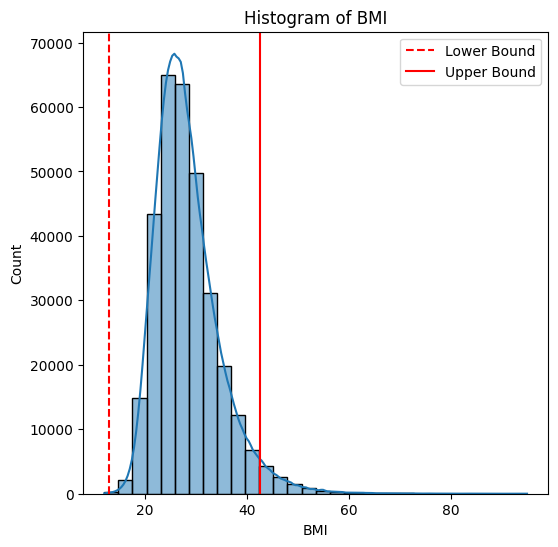

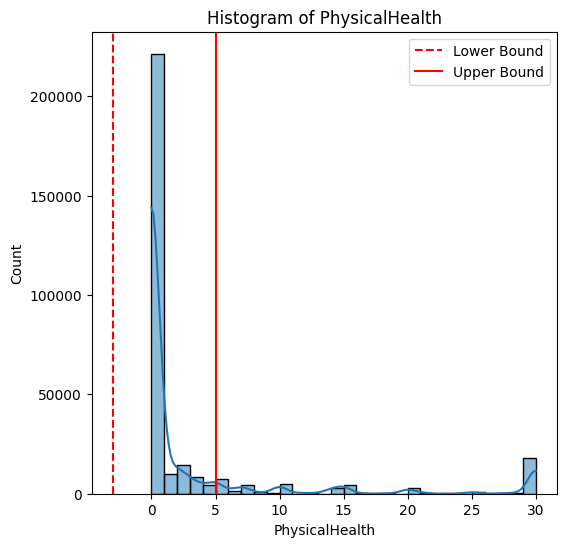

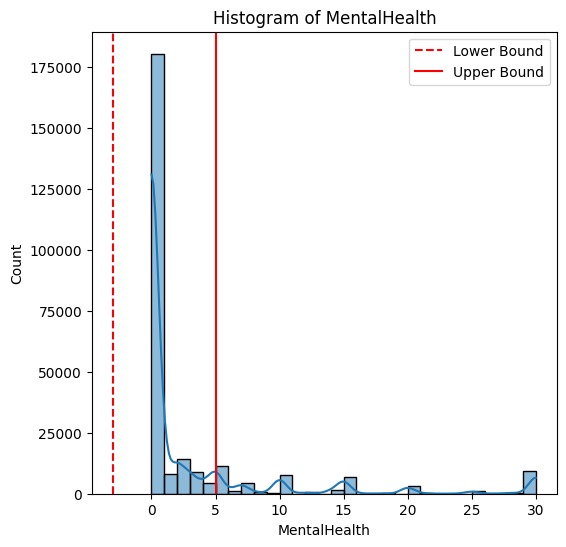

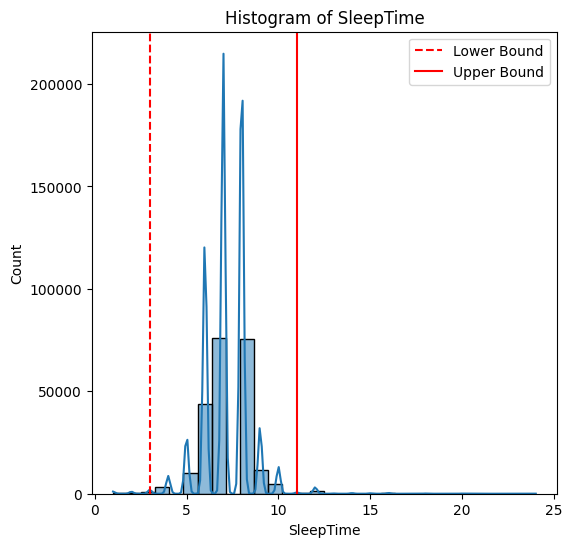

<class 'pandas.core.frame.DataFrame'>
Index: 225471 entries, 1 to 319792
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      225471 non-null  int64  
 1   BMI               225471 non-null  float64
 2   Smoking           225471 non-null  int64  
 3   AlcoholDrinking   225471 non-null  int64  
 4   Stroke            225471 non-null  int64  
 5   PhysicalHealth    225471 non-null  float64
 6   MentalHealth      225471 non-null  float64
 7   DiffWalking       225471 non-null  int64  
 8   Sex               225471 non-null  int64  
 9   AgeCategory       225471 non-null  int64  
 10  Race              225471 non-null  int64  
 11  Diabetic          225471 non-null  int64  
 12  PhysicalActivity  225471 non-null  int64  
 13  GenHealth         225471 non-null  int64  
 14  SleepTime         225471 non-null  float64
 15  Asthma            225471 non-null  int64  
 16  KidneyDisease     225471 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers_using_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Vẽ biểu đồ phân phối với các đường giới hạn ngoài
    plt.figure(figsize=(6, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='r', linestyle='-', label='Upper Bound')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

    # Loại bỏ các giá trị ngoại lai
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Áp dụng hàm remove_outliers_using_iqr cho các cột cần thiết
columns_to_clean = ['BMI', 'PhysicalHealth', 'MentalHealth','SleepTime']
for column in columns_to_clean:
    df = remove_outliers_using_iqr(df, column)

# Hiển thị thông tin DataFrame sau khi loại bỏ giá trị ngoại lai
print(df.info())

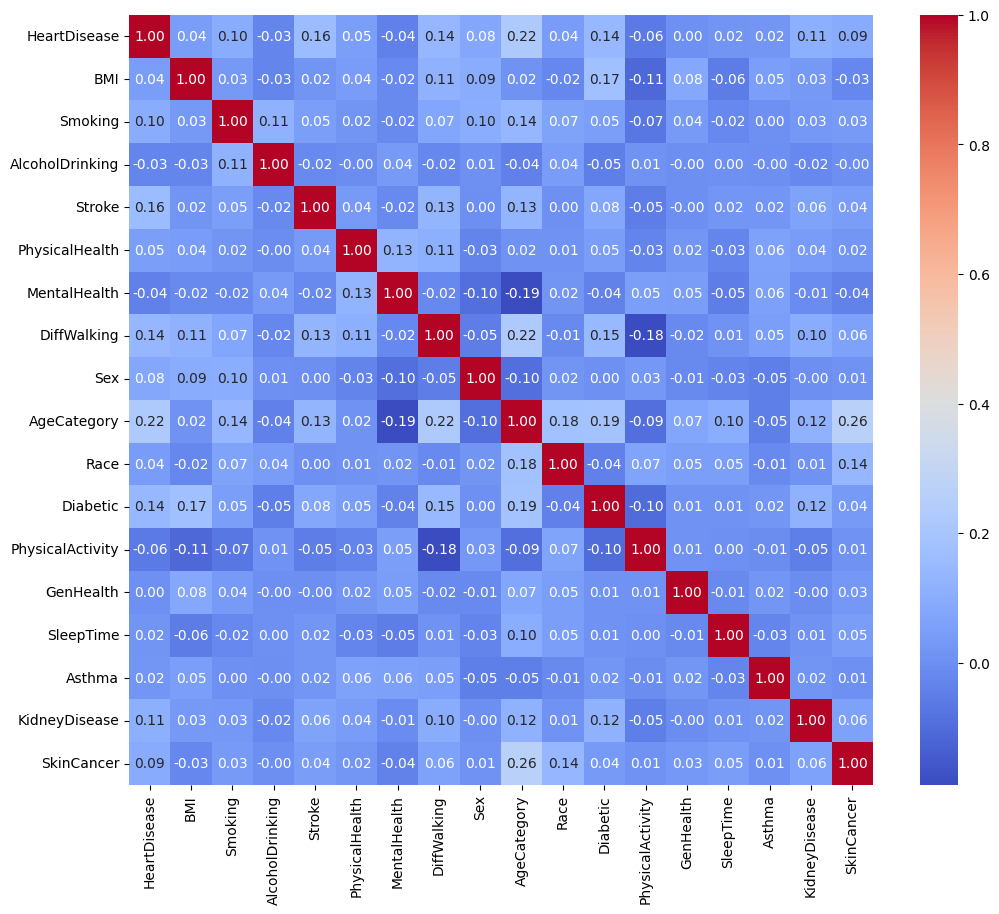

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn
corr = df.corr()

# Vẽ biểu đồ heatmap với annot và fmt
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()


### 3.3 Chia tập dữ liệu

In [ ]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

Phương pháp ELBOW: Chọn k theo điểm gẫy trên đường cong


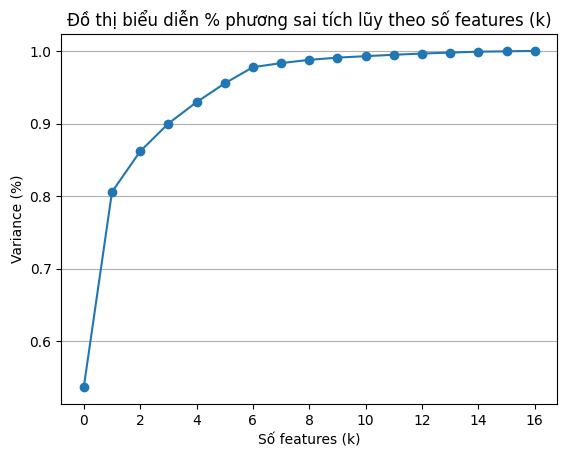

In [ ]:
from sklearn.decomposition import PCA
# Áp dụng PCA không giới hạn số lượng thành phần
pca = PCA()
pca.fit(X.select_dtypes(include=[float, int]))

# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
print('Phương pháp ELBOW: Chọn k theo điểm gẫy trên đường cong')
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.grid(axis='y')
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from  imblearn.over_sampling import KMeansSMOTE
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X.select_dtypes(include=[float, int]))

print(X_pca)


[[-6.99619164 -5.58377184  1.69193726 ... -0.60909904 -0.14573267
  -0.11098812]
 [-3.19401382 -4.4104028  -0.32301019 ... -0.62865699  0.04191365
   0.73925879]
 [ 4.28114395 -5.38182598 -0.4394361  ...  0.01001379  0.85971003
   0.74372532]
 ...
 [-5.51165457  6.62602893 -2.09057099 ... -0.55468154  0.2010341
  -0.12379231]
 [ 2.34319069  3.77727012  1.60914733 ...  0.67926319  0.24961354
  -0.26169716]
 [-3.29567106  1.70838965 -0.28151434 ... -0.6153541   0.04290578
  -0.18735932]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# # Chia dữ liệu thành tập huấn luyện, kiểm tra, và xác thực
X_train_val, X_test, y_train_val, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import KMeansSMOTE
KSMOTE  = KMeansSMOTE(cluster_balance_threshold=0.1)
X_train, y_train = KSMOTE.fit_resample(X_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_train_class_counts = pd.Series(y_train).value_counts()
y_val_class_counts = pd.Series(y_val).value_counts()
y_test_class_counts = pd.Series(y_test).value_counts()

print("Số lượng mỗi lớp trong tập huấn luyện sau khi cân bằng:")
print(y_train_class_counts)
print("\nSố lượng mỗi lớp trong tập xác thực:")
print(y_val_class_counts)
print("\nSố lượng mỗi lớp trong tập kiểm tra:")
print(y_test_class_counts)

Số lượng mỗi lớp trong tập huấn luyện sau khi cân bằng:
HeartDisease
1    125988
0    125987
Name: count, dtype: int64

Số lượng mỗi lớp trong tập xác thực:
HeartDisease
0    31436
1     2385
Name: count, dtype: int64

Số lượng mỗi lớp trong tập kiểm tra:
HeartDisease
0    52417
1     3951
Name: count, dtype: int64


### 3.4 Xây dựng hàm đánh giá mô hình

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def model(classifier):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    prediction = classifier.predict(X_val)

    # Cross-validation using training data
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='roc_auc')

    # Evaluation metrics
    print("Accuracy Score:", '{0:.2%}'.format(accuracy_score(y_val, prediction)))
    print("Cross Validation Score:", '{0:.2%}'.format(cv_scores.mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_val, prediction)))

    # Plot ROC Curve
    RocCurveDisplay.from_estimator(classifier, X_val, y_val)
    plt.title("ROC_AUC_Plot")
    plt.show()

def model_evaluation(classifier):
    # Generate a confusion matrix based on the test set
    cm = confusion_matrix(y_test, classifier.predict(X_test))

    # Format the confusion matrix
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Visualize the confusion matrix with seaborn
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    plt.show()

    # Print classification report using the test set
    print(classification_report(y_test, classifier.predict(X_test)))

## 4. Thử nghiệm với các mô hình

### 4.1 Mô hình GausianNB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Define the GaussianNB classifier
classifier_NB_Test = GaussianNB()

# Set up the parameter grid. We adjust 'var_smoothing' over a logarithmic scale
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Setup GridSearchCV with verbose=3 for detailed output
grid_search_nb = GridSearchCV(estimator=classifier_NB_Test, param_grid=param_grid_nb, cv=5, scoring='f1', n_jobs=-1, verbose=3)

# Assuming X_train and y_train are your training data
grid_search_nb.fit(X_train, y_train)

# After fitting, you can see the best parameters and the best score achieved
print("Best Parameters:", grid_search_nb.best_params_)
print("Best Score:", grid_search_nb.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'var_smoothing': 0.0533669923120631}
Best Score: 0.8340735031693409


Accuracy Score: 72.07%
Cross Validation Score: 90.93%
ROC_AUC Score: 67.81%


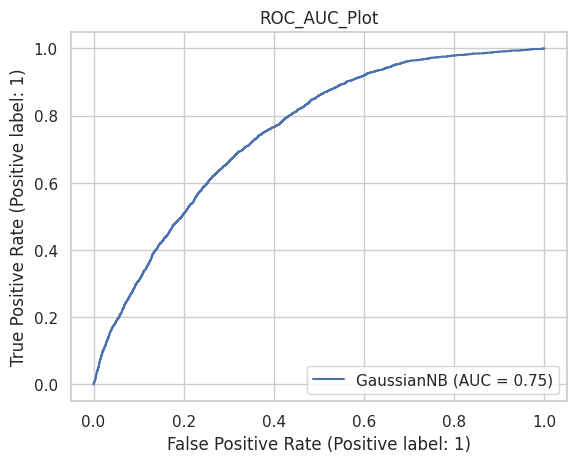

In [ ]:
classifier_NB = GaussianNB(var_smoothing=0.0533669923120631)
model(classifier_NB)

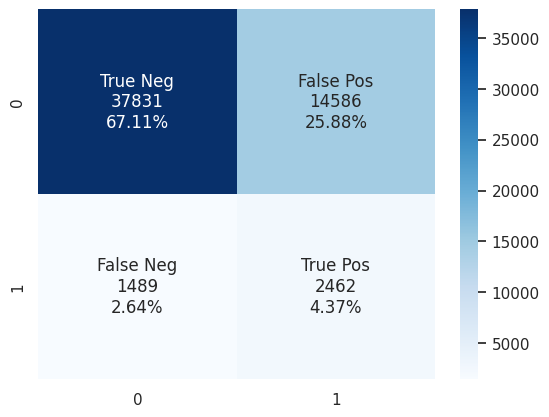

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     52417
           1       0.14      0.62      0.23      3951

    accuracy                           0.71     56368
   macro avg       0.55      0.67      0.53     56368
weighted avg       0.90      0.71      0.78     56368



In [ ]:
model_evaluation(classifier_NB)

Nhận Xét Chi Tiết Về F1 Score:

Lớp 0 (Lớp đa số):

F1 score của Lớp 0 là 0.82, cho thấy sự cân bằng tốt giữa độ chính xác (0.96) và độ nhớ (0.72).
F1 score cao này cho thấy mô hình hiệu quả trong việc nhận diện đúng lớp đa số, với độ chính xác cao cho thấy ít sai sót dương và độ nhớ trung bình cho thấy một số sai sót âm.

Lớp 1 (Lớp thiểu số):

F1 score của Lớp 1 thấp đáng kể ở mức 0.23, do độ chính xác thấp (0.14) và độ nhớ trung bình (0.62).
Độ chính xác thấp cho thấy số lượng sai sót dương cao, nghĩa là nhiều trường hợp được dự đoán là Lớp 1 nhưng thực tế lại là Lớp 0.
Độ nhớ trung bình cho thấy mô hình có thể nhận diện một phần tốt các trường hợp thực sự thuộc Lớp 1 nhưng gặp khó khăn với các sai sót dương, dẫn đến F1 score thấp.

Trung bình Macro:

Trung bình macro F1 score là 0.53, trung bình F1 score của cả hai lớp mà không tính đến sự mất cân bằng giữa các lớp.
Điểm số này phản ánh hiệu suất kém của mô hình trên lớp thiểu số (Lớp 1), kéo thấp trung bình macro tổng thể.

Trung bình Weighted:

Trung bình weighted F1 score là 0.78, tính đến sự mất cân bằng lớp bằng cách cho nhiều trọng số hơn cho lớp đa số.
Điểm số cao hơn so với trung bình macro cho thấy hiệu suất tổng thể của mô hình tốt hơn khi xem xét sự mất cân bằng lớp, nhấn mạnh hiệu suất mạnh hơn của mô hình trên Lớp 0.


### 4.2 Mô hình LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Tạo một mô hình LogisticRegression
classifier_LR_Test = LogisticRegression(solver='liblinear')

# Định nghĩa các tham số cần tìm kiếm
param_grid = {
    'C': [ 0.001, 0.01, 0.1, 1, 10, 100],  # Các giá trị cho C
    'penalty': ['l1', 'l2']  # L1 và L2 regularization
}

# Thiết lập GridSearchCV với verbose=3
grid_search = GridSearchCV(estimator=classifier_LR_Test, param_grid=param_grid, cv=5, scoring='f1', verbose=3)

# Tiến hành tìm kiếm trên dữ liệu
# Giả sử X và y là dữ liệu đầu vào của bạn
grid_search.fit(X_train, y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.790 total time=   0.7s
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.846 total time=   0.7s
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.842 total time=   0.7s
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.844 total time=   0.6s
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.803 total time=   0.7s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.794 total time=   0.5s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.848 total time=   0.6s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.843 total time=   0.6s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.845 total time=   0.7s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.806 total time=   0.8s
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.789 total time=   1.0s
[CV 2/5] END ................C=0.01, penalty=l1;

Accuracy Score: 75.40%
Cross Validation Score: 88.48%
ROC_AUC Score: 70.98%


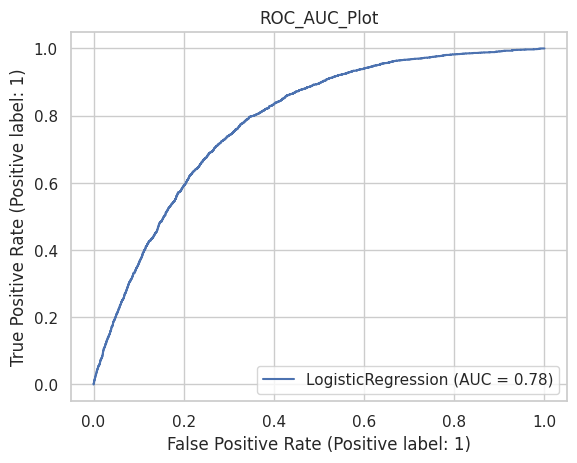

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(C=0.001, penalty='l2', solver='liblinear')
model(classifier_LR)

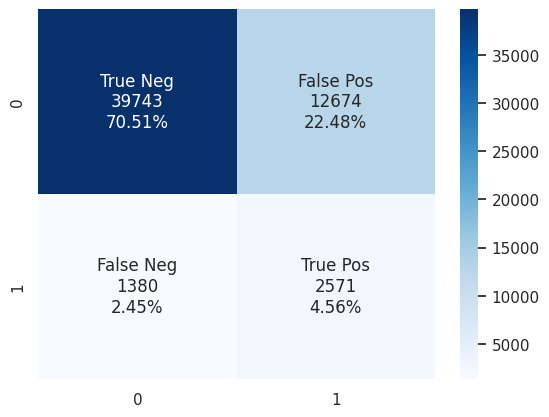

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     52417
           1       0.17      0.65      0.27      3951

    accuracy                           0.75     56368
   macro avg       0.57      0.70      0.56     56368
weighted avg       0.91      0.75      0.81     56368



In [ ]:
model_evaluation(classifier_LR)

Nhận Xét Chi Tiết Về F1 Score:

Lớp 0 (Lớp đa số):

F1 score của Lớp 0 là 0.85, cho thấy sự cân bằng tốt giữa độ chính xác (0.97) và độ nhớ (0.76).
F1 score cao này cho thấy mô hình hiệu quả trong việc nhận diện đúng lớp đa số, với độ chính xác cao cho thấy ít sai sót dương và độ nhớ trung bình cho thấy một số sai sót âm.

Lớp 1 (Lớp thiểu số):

F1 score của Lớp 1 thấp đáng kể ở mức 0.27, do độ chính xác thấp (0.17) và độ nhớ trung bình (0.65).
Độ chính xác thấp cho thấy số lượng sai sót dương cao, nghĩa là nhiều trường hợp được dự đoán là Lớp 1 nhưng thực tế lại là Lớp 0.
Độ nhớ trung bình cho thấy mô hình có thể nhận diện một phần tốt các trường hợp thực sự thuộc Lớp 1 nhưng gặp khó khăn với các sai sót dương, dẫn đến F1 score thấp.

Trung bình Macro:

Trung bình macro F1 score là 0.56, trung bình F1 score của cả hai lớp mà không tính đến sự mất cân bằng giữa các lớp.
Điểm số này phản ánh hiệu suất kém của mô hình trên lớp thiểu số (Lớp 1), kéo thấp trung bình macro tổng thể.

Trung bình Weighted:

Trung bình weighted F1 score là 0.81, tính đến sự mất cân bằng lớp bằng cách cho nhiều trọng số hơn cho lớp đa số.
Điểm số cao hơn so với trung bình macro cho thấy hiệu suất tổng thể của mô hình tốt hơn khi xem xét sự mất cân bằng lớp, nhấn mạnh hiệu suất mạnh hơn của mô hình trên Lớp 0.


### 4.3 Mô hình KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNeighborsClassifier
classifier_KNN_Test = KNeighborsClassifier()

# Define the parameter grid for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 10 , 15, 50]
}

# Setup GridSearchCV for KNeighborsClassifier
grid_search_knn = GridSearchCV(estimator=classifier_KNN_Test, param_grid=param_grid_knn, cv=5, scoring='f1', verbose=3)
grid_search_knn.fit(X_train, y_train)

# Output the best parameters and best score
print("KNN Best Parameters:", grid_search_knn.best_params_)
print("KNN Best Score:", grid_search_knn.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.876 total time=  17.2s
[CV 2/5] END .....................n_neighbors=3;, score=0.954 total time=   8.6s
[CV 3/5] END .....................n_neighbors=3;, score=0.955 total time=   6.6s
[CV 4/5] END .....................n_neighbors=3;, score=0.953 total time=   5.8s
[CV 5/5] END .....................n_neighbors=3;, score=0.862 total time=   8.4s
[CV 1/5] END .....................n_neighbors=5;, score=0.868 total time=   8.8s
[CV 2/5] END .....................n_neighbors=5;, score=0.948 total time=   8.1s
[CV 3/5] END .....................n_neighbors=5;, score=0.948 total time=   7.2s
[CV 4/5] END .....................n_neighbors=5;, score=0.948 total time=   8.3s
[CV 5/5] END .....................n_neighbors=5;, score=0.806 total time=   7.9s
[CV 1/5] END ....................n_neighbors=10;, score=0.854 total time=  10.2s
[CV 2/5] END ....................n_neighbors=10;,

Accuracy Score: 87.36%
Cross Validation Score: 96.37%
ROC_AUC Score: 59.03%


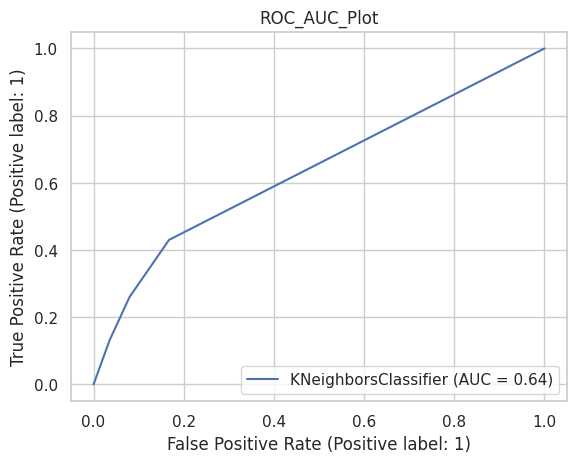

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors=3)
model(classifier_KNN)

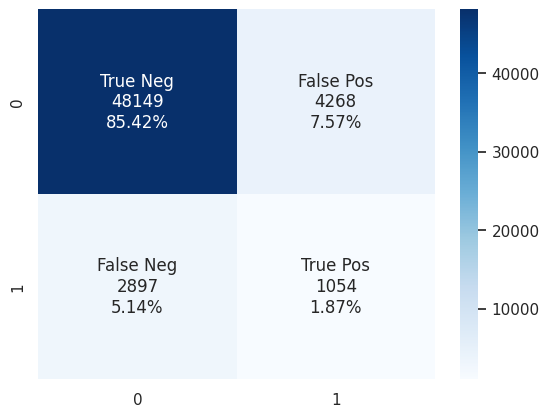

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     52417
           1       0.20      0.27      0.23      3951

    accuracy                           0.87     56368
   macro avg       0.57      0.59      0.58     56368
weighted avg       0.89      0.87      0.88     56368



In [ ]:
model_evaluation(classifier_KNN)

Nhận Xét Chi Tiết Về F1 Score:

Lớp 0 (Lớp đa số):

F1 score của Lớp 0 là 0.93, cho thấy sự cân bằng rất tốt giữa độ chính xác (0.94) và độ nhớ (0.92).
F1 score cao này cho thấy mô hình hiệu quả trong việc nhận diện đúng lớp đa số, với độ chính xác cao cho thấy ít sai sót dương và độ nhớ cao cho thấy ít sai sót âm.

Lớp 1 (Lớp thiểu số):

F1 score của Lớp 1 thấp ở mức 0.23, do độ chính xác thấp (0.20) và độ nhớ thấp (0.27).
Độ chính xác thấp cho thấy số lượng sai sót dương cao, nghĩa là nhiều trường hợp được dự đoán là Lớp 1 nhưng thực tế lại là Lớp 0.
Độ nhớ thấp cho thấy mô hình gặp khó khăn trong việc nhận diện đúng các trường hợp thực sự thuộc Lớp 1, dẫn đến F1 score thấp.

Trung bình Macro:

Trung bình macro F1 score là 0.58, trung bình F1 score của cả hai lớp mà không tính đến sự mất cân bằng giữa các lớp.
Điểm số này phản ánh hiệu suất kém của mô hình trên lớp thiểu số (Lớp 1), kéo thấp trung bình macro tổng thể.

Trung bình Weighted:

Trung bình weighted F1 score là 0.88, tính đến sự mất cân bằng lớp bằng cách cho nhiều trọng số hơn cho lớp đa số.
Điểm số cao hơn so với trung bình macro cho thấy hiệu suất tổng thể của mô hình tốt hơn khi xem xét sự mất cân bằng lớp, nhấn mạnh hiệu suất mạnh hơn của mô hình trên Lớp 0.


### 4.4 Mô hình DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the DecisionTreeClassifier
classifier_DT_Test = DecisionTreeClassifier()

# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [None, 10, 30 , 50 ,100 , 150 , 300]
}

# Setup GridSearchCV for DecisionTreeClassifier
grid_search_dt = GridSearchCV(estimator=classifier_DT_Test, param_grid=param_grid_dt, cv=5, scoring='f1', verbose=3)
grid_search_dt.fit(X_train, y_train)

# Output the best parameters and best score
print("DT Best Parameters:", grid_search_dt.best_params_)
print("DT Best Score:", grid_search_dt.best_score_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ....................max_depth=None;, score=0.857 total time=   6.1s
[CV 2/5] END ....................max_depth=None;, score=0.945 total time=  15.8s
[CV 3/5] END ....................max_depth=None;, score=0.946 total time=   8.9s
[CV 4/5] END ....................max_depth=None;, score=0.944 total time=   9.1s
[CV 5/5] END ....................max_depth=None;, score=0.850 total time=   9.5s
[CV 1/5] END ......................max_depth=10;, score=0.825 total time=   3.4s
[CV 2/5] END ......................max_depth=10;, score=0.919 total time=   4.5s
[CV 3/5] END ......................max_depth=10;, score=0.918 total time=   4.3s
[CV 4/5] END ......................max_depth=10;, score=0.918 total time=   3.7s
[CV 5/5] END ......................max_depth=10;, score=0.711 total time=   3.8s
[CV 1/5] END ......................max_depth=30;, score=0.857 total time=   7.0s
[CV 2/5] END ......................max_depth=30;,

Accuracy Score: 86.97%
Cross Validation Score: 92.68%
ROC_AUC Score: 58.21%


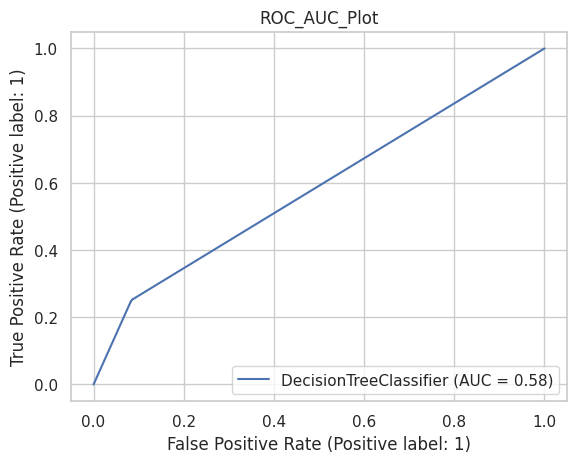

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(max_depth=None)
model(classifier_DT)

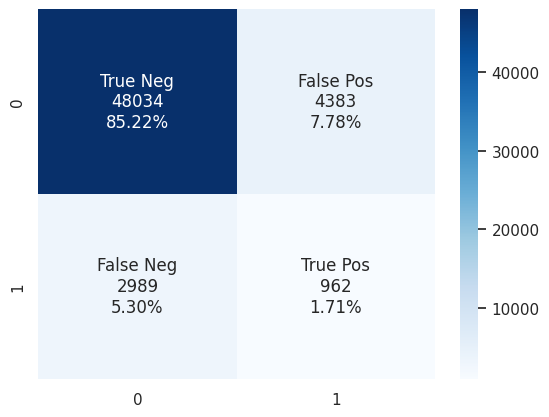

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     52417
           1       0.18      0.24      0.21      3951

    accuracy                           0.87     56368
   macro avg       0.56      0.58      0.57     56368
weighted avg       0.89      0.87      0.88     56368



In [ ]:
model_evaluation(classifier_DT)

Nhận Xét Chi Tiết Về F1 Score:

Lớp 0 (Lớp đa số):

F1 score của Lớp 0 là 0.93, cho thấy sự cân bằng rất tốt giữa độ chính xác (0.94) và độ nhớ (0.92).
F1 score cao này cho thấy mô hình hiệu quả trong việc nhận diện đúng lớp đa số, với độ chính xác cao cho thấy ít sai sót dương và độ nhớ cao cho thấy ít sai sót âm.

Lớp 1 (Lớp thiểu số):

F1 score của Lớp 1 thấp ở mức 0.21, do độ chính xác thấp (0.18) và độ nhớ thấp (0.24).
Độ chính xác thấp cho thấy số lượng sai sót dương cao, nghĩa là nhiều trường hợp được dự đoán là Lớp 1 nhưng thực tế lại là Lớp 0.
Độ nhớ thấp cho thấy mô hình gặp khó khăn trong việc nhận diện đúng các trường hợp thực sự thuộc Lớp 1, dẫn đến F1 score thấp.
Trung bình Macro:

Trung bình macro F1 score là 0.57, trung bình F1 score của cả hai lớp mà không tính đến sự mất cân bằng giữa các lớp.
Điểm số này phản ánh hiệu suất kém của mô hình trên lớp thiểu số (Lớp 1), kéo thấp trung bình macro tổng thể.

Trung bình Weighted:

Trung bình weighted F1 score là 0.88, tính đến sự mất cân bằng lớp bằng cách cho nhiều trọng số hơn cho lớp đa số.
Điểm số cao hơn so với trung bình macro cho thấy hiệu suất tổng thể của mô hình tốt hơn khi xem xét sự mất cân bằng lớp, nhấn mạnh hiệu suất mạnh hơn của mô hình trên Lớp 0.

### 4.5 Mô hình RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the RandomForestClassifier
classifier_RF_Test = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100 ,150],
    'max_depth': [None, 15, 30, 50]
}

# Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=classifier_RF_Test, param_grid=param_grid_rf, cv=5, scoring='f1', verbose=3)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters and scores
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...max_depth=None, n_estimators=50;, score=0.843 total time= 1.3min
[CV 2/5] END ...max_depth=None, n_estimators=50;, score=0.959 total time= 1.3min
[CV 3/5] END ...max_depth=None, n_estimators=50;, score=0.967 total time= 1.2min
[CV 4/5] END ...max_depth=None, n_estimators=50;, score=0.965 total time= 1.2min
[CV 5/5] END ...max_depth=None, n_estimators=50;, score=0.956 total time= 1.2min
[CV 1/5] END ..max_depth=None, n_estimators=100;, score=0.845 total time= 2.3min
[CV 2/5] END ..max_depth=None, n_estimators=100;, score=0.960 total time= 2.5min
[CV 3/5] END ..max_depth=None, n_estimators=100;, score=0.966 total time= 2.5min
[CV 4/5] END ..max_depth=None, n_estimators=100;, score=0.966 total time= 2.5min
[CV 5/5] END ..max_depth=None, n_estimators=100;, score=0.956 total time= 2.5min
[CV 1/5] END ..max_depth=None, n_estimators=150;, score=0.846 total time= 3.5min
[CV 2/5] END ..max_depth=None, n_estimators=150;

Accuracy Score: 89.20%
Cross Validation Score: 98.58%
ROC_AUC Score: 58.49%


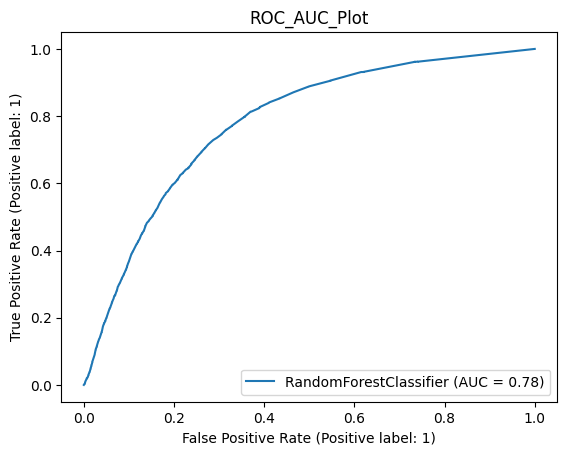

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(max_depth=50,n_estimators=150)
model(classifier_RF)

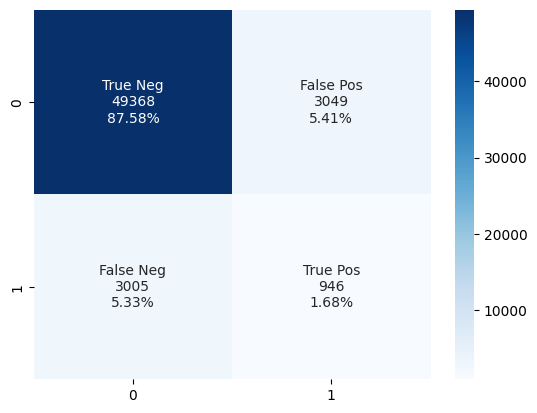

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     52417
           1       0.24      0.24      0.24      3951

    accuracy                           0.89     56368
   macro avg       0.59      0.59      0.59     56368
weighted avg       0.89      0.89      0.89     56368



In [ ]:
model_evaluation(classifier_RF)

Nhận Xét Chi Tiết Về F1 Score:

Lớp 0 (Lớp đa số):

F1 score của Lớp 0 là 0.94, cho thấy sự cân bằng rất tốt giữa độ chính xác (0.94) và độ nhớ (0.94).
F1 score cao này cho thấy mô hình hiệu quả trong việc nhận diện đúng lớp đa số, với độ chính xác cao cho thấy ít sai sót dương và độ nhớ cao cho thấy ít sai sót âm.
Lớp 1 (Lớp thiểu số):

F1 score của Lớp 1 thấp ở mức 0.24, do độ chính xác thấp (0.24) và độ nhớ thấp (0.24).
Độ chính xác thấp cho thấy số lượng sai sót dương cao, nghĩa là nhiều trường hợp được dự đoán là Lớp 1 nhưng thực tế lại là Lớp 0.
Độ nhớ thấp cho thấy mô hình gặp khó khăn trong việc nhận diện đúng các trường hợp thực sự thuộc Lớp 1, dẫn đến F1 score thấp.

Trung bình Macro:

Trung bình macro F1 score là 0.59, trung bình F1 score của cả hai lớp mà không tính đến sự mất cân bằng giữa các lớp.
Điểm số này phản ánh hiệu suất kém của mô hình trên lớp thiểu số (Lớp 1), kéo thấp trung bình macro tổng thể.

Trung bình Weighted:

Trung bình weighted F1 score là 0.89, tính đến sự mất cân bằng lớp bằng cách cho nhiều trọng số hơn cho lớp đa số.
Điểm số cao hơn so với trung bình macro cho thấy hiệu suất tổng thể của mô hình tốt hơn khi xem xét sự mất cân bằng lớp, nhấn mạnh hiệu suất mạnh hơn của mô hình trên Lớp 0.


### 4.6 Đánh giá tổng quan các mô hình

In [ ]:
import pandas as pd

# Create a DataFrame with the given information
data = {
    "Model": ["GaussianNB", "Logistic Regression", "KNeighbors Classifier", "Decision Tree Classifier", "Random Forest Classifier"],
    "Accuracy Score": [72.07, 75.40, 87.36, 86.97, 89.20],
    "Cross Validation Score": [90.93, 88.48, 96.37, 92.68, 98.58],
    "ROC_AUC Score": [67.81, 70.98, 59.03, 58.21, 58.49],
    "Weighted Average F1 Score": [0.78, 0.81, 0.88, 0.88, 0.89]
}

table = pd.DataFrame(data)
# Display the DataFrame
table


,Model,Accuracy Score,Cross Validation Score,ROC_AUC Score,Weighted Average F1 Score
0,GaussianNB,72.07,90.93,67.81,0.78
1,Logistic Regression,75.40,88.48,70.98,0.81
2,KNeighbors Classifier,87.36,96.37,59.03,0.88
3,Decision Tree Classifier,86.97,92.68,58.21,0.88
4,Random Forest Classifier,89.20,98.58,58.49,0.89


__GaussianNB:__

Ưu điểm: Độ chính xác chấp nhận được với Accuracy Score là 72.07% và Cross Validation Score cao 90.93%.

Nhược điểm: ROC_AUC Score ở mức trung bình (67.81) và Weighted Average F1 Score thấp nhất trong số các mô hình (0.78).

Tổng quan: Phù hợp khi yêu cầu về tốc độ và đơn giản, nhưng không thích hợp cho dữ liệu mất cân bằng lớn.

__Logistic Regression:__

Ưu điểm: Độ chính xác và Weighted Average F1 Score cải thiện so với GaussianNB. ROC_AUC Score cũng tốt hơn (70.98).

Nhược điểm: Weighted Average F1 Score vẫn thấp hơn một số mô hình khác (0.81).
Tổng quan: Là một sự lựa chọn tốt hơn cho các bài toán đơn giản và dữ liệu có cân bằng tốt hơn GaussianNB.

__KNeighbors Classifier:__

Ưu điểm: Độ chính xác tổng thể cao (87.36%) và Weighted Average F1 Score cao (0.88).

Nhược điểm: ROC_AUC Score thấp nhất trong các mô hình (59.03).

Tổng quan: Có khả năng dự đoán tốt tổng thể nhưng không hiệu quả về ROC_AUC Score. Phù hợp khi trọng số của F1 Score quan trọng hơn ROC_AUC Score.

__Decision Tree Classifier:__

Ưu điểm: Độ chính xác tổng thể cao (86.97%) và Weighted Average F1 Score tốt (0.88).

Nhược điểm: ROC_AUC Score cũng thấp (58.21).

Tổng quan: Đơn giản và dễ hiểu, nhưng không hiệu quả về ROC_AUC Score.

__Random Forest Classifier:__

Ưu điểm: Độ chính xác tổng thể cao nhất (89.20%), Weighted Average F1 Score cao nhất (0.89), và Cross Validation Score cao nhất (98.58%).

Nhược điểm: ROC_AUC Score vẫn thấp (58.49), nhưng cao hơn Decision Tree và KNeighbors.

Tổng quan: Là mô hình mạnh nhất trong các mô hình đã thử nghiệm, với độ chính xác và F1 Score cao nhất. Mặc dù ROC_AUC Score không cao nhất, nhưng nó vẫn tốt hơn một số mô hình khác.

__Kết luận:__

Random Forest Classifier là lựa chọn tốt nhất cho bài toán này dựa trên các chỉ số đã cung cấp, với độ chính xác và Weighted Average F1 Score cao nhất. Mặc dù ROC_AUC Score chưa cao, nhưng với các ưu điểm khác, Random Forest vẫn vượt trội hơn các mô hình khác.